# 1.Importing Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
filename='titanic_dataset.csv'
df=pd.read_csv(filename, index_col="PassengerId")

# 2.Check basic details of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**We see that there are missing values in the fields "Age","Cabin", and "Embarked". Age can be filled using a mean of all values in that column. Checking for the number of unique values in Cabin, and Embarked**

In [4]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# 4.Filling in missing values in the dataset

**Visualising some of the columns in the dataset using plots**

C:\Users\Dilip\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

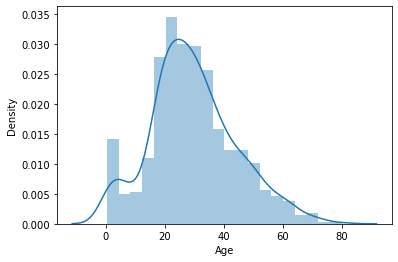

In [5]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

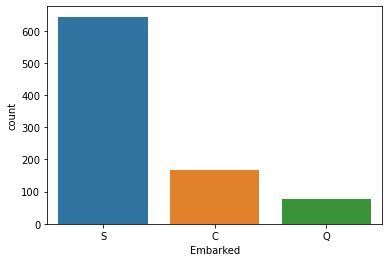

In [6]:
sns.countplot(x=df['Embarked'])

**For the column "Cabin", checking the actual data using a stratification**

In [7]:
df['Cabin'][0:890:50]

PassengerId
1          NaN
51         NaN
101        NaN
151        NaN
201        NaN
251        NaN
301        NaN
351        NaN
401        NaN
451        NaN
501        NaN
551        C70
601        NaN
651        NaN
701    C62 C64
751        NaN
801        NaN
851        NaN
Name: Cabin, dtype: object

**Since the categorical column "Cabin" has a majority of nulls, that column may not be fillable by ordinary methods, and will be dropped.**
**For Age, we use median value, since the data is skewed, and for "Embarked", we use "S" as that is the mode, of the ordinal data**

In [8]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [9]:
df['Embarked'].mode()

0    S
dtype: object

In [10]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [12]:
df.drop('Cabin', inplace=True,axis=1)

# 5.Check and handle outliers in atleast 3 columns in the dataset

Text(0.5, 0.98, 'Box plots of features which are going to be checked for outliers')

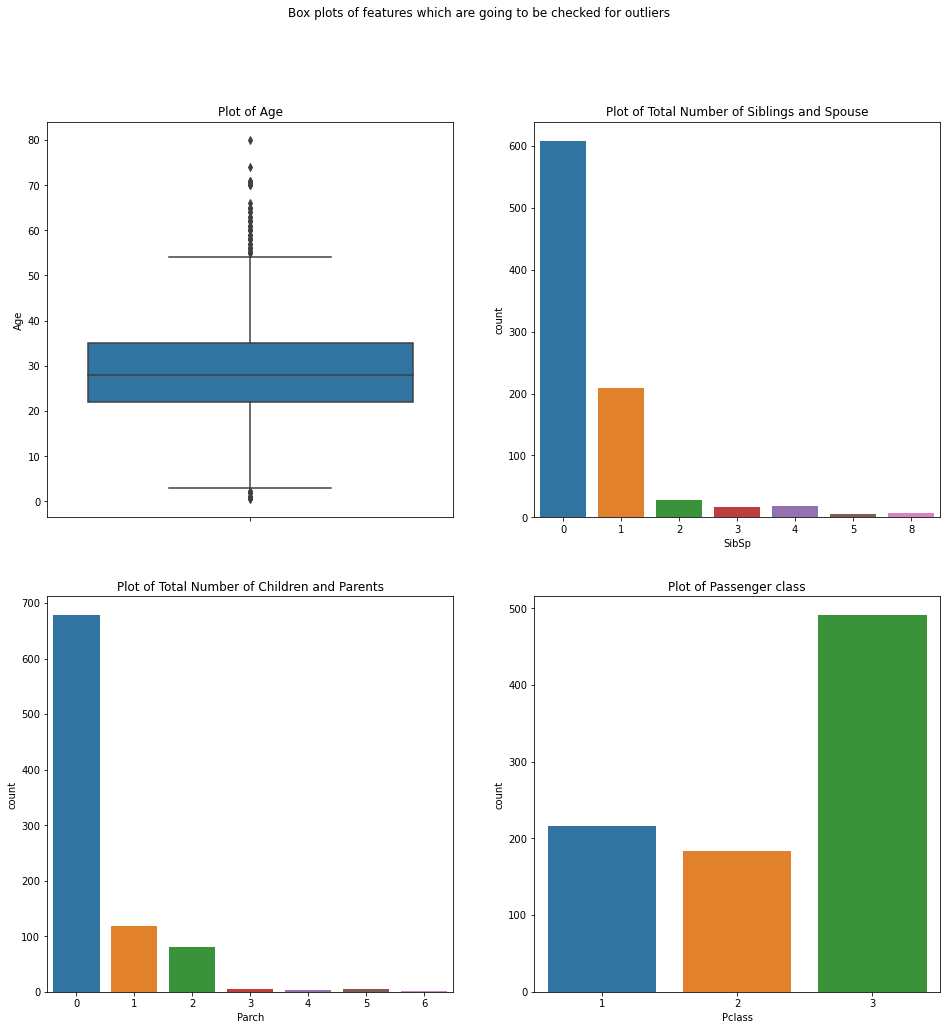

In [27]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2, figsize=(16,16))
sns.boxplot(ax=axes[0,0],data=df,y=df['Age']).set_title("Plot of Age")
sns.countplot(ax=axes[0,1],data=df,x=df['SibSp']).set_title("Plot of Total Number of Siblings and Spouse")
sns.countplot(ax=axes[1,0],data=df,x=df['Parch']).set_title("Plot of Total Number of Children and Parents")
sns.countplot(ax=axes[1,1],data=df,x=df['Pclass']).set_title("Plot of Passenger class")
fig.suptitle("Box plots of features which are going to be checked for outliers")
#plt.tight_layout()
#sns.boxplot(y=df['Age']).set_title("Plot of Age")

# a)Age
For the age column(***making the assumption of normal distribution, which is not actually valid for the given dataset)***, we could find the traditionally defined interquartile range, and identify outliers using this**

*However, this will not be valid for the problem under consideration (survival of passenger) and therefore, the training data will not be truncated based on age*

In [28]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 22.0  Q2= 28.0  Q3= 35.0


In [29]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim)
outlier = []
for x in df['Age']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

Lower limit =  2.5  Upper limit =  54.5


[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

**In case of a normal distribution, we could have deleted the rows, with the above Age data - but this cannot be done here**

# b)Fare

In [30]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print("Q1=",Q1," Q2=",Q2," Q3=",Q3)

Q1= 7.9104  Q2= 14.4542  Q3= 31.0


In [31]:
IQR=Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ",low_lim," Upper limit = ",up_lim)
outlier = []
for x in df['Fare']:
    if (x>up_lim) or (x<low_lim):
        outlier.append(x)
outlier

Lower limit =  -26.724  Upper limit =  65.6344


[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In the case of the column "Fare" there are several outliers, ***but for the current exploration, no filtering will be done on "Fare", just as none was done in the case of "Age"*

In [34]:
print("The count of outliers in the case of Fare is: ",len(outlier))

The count of outliers in the case of Fare is:  116


*The above count simply shows that (under the assumption of normal distribution ) the number of outliers in the "Fare" feature is 116*

**Also, since there are no other features that offer any scope for outlier calculation, we proceed to next step (towards model creation)**

# 6. Scaling

**Since the dataset is still having a lot of categorical variables, we shall encode 5 of the columns , viz. Sex, Embarked, Pclass, Sibsp, and Parch and drop the 2 columns Name, and Ticket (Cabin was already dropped before)**

In [35]:
df.drop(['Name','Ticket'],inplace=True,axis=1)

In [36]:
categorical_cols=['Sex','Pclass','SibSp','Parch','Embarked']
for column in categorical_cols:
    encoded_cols_df = pd.get_dummies(df[column], prefix=column)
    df=pd.merge(
        left=df,
        right=encoded_cols_df,
        left_index=True,
        right_index=True
    )
    
    df=df.drop(columns=column)
    
df.head()

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1,38.0,71.2833,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,1,26.0,7.9250,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,35.0,53.1000,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
5,0,35.0,8.0500,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


**We see that there are now 25 columns after one hot encoding and now we are ready to go to min max scaling**

**First, let us check the correlation**

<AxesSubplot:>

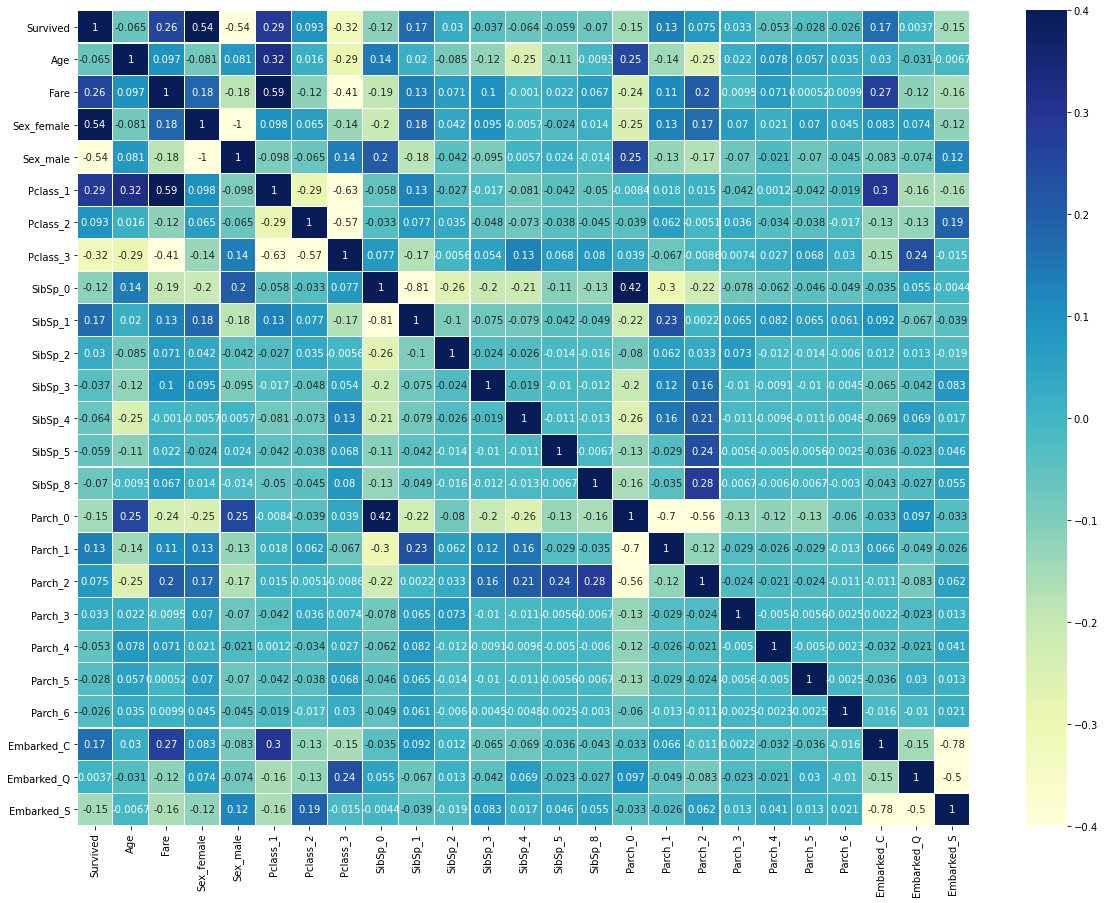

In [39]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-0.4,vmax=0.4,annot=True, linewidths=0.1, cmap='YlGnBu')

**Specifying the "Survived" column as the target "y" in model creation, using linear regression model and remaining columns as features ie, X**

In [40]:
y=df['Survived']
X=df.drop('Survived', axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [46]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions= model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R-squared value is: ',r2_score(y_test,predictions))

MSE is:  0.14227639326390257
R-squared value is:  0.4067363105298831


*These values are BEFORE min-max scaling. Now to perform min max scaling...*

In [48]:
X.describe()

,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.352413,0.647587,0.242424,0.206510,0.551066,0.682379,0.234568,0.031425,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,13.019697,49.693429,0.477990,0.477990,0.428790,0.405028,0.497665,0.465813,0.423966,0.174562,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.363679,0.062858,0.352413,0.647587,0.242424,0.206510,0.551066,0.682379,0.234568,0.031425,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.163605,0.096995,0.477990,0.477990,0.428790,0.405028,0.497665,0.465813,0.423966,0.174562,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346569,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.434531,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions= model.predict(X_test)
print('MSE is: ', mean_squared_error(y_test,predictions))
print('R-squared value is: ',r2_score(y_test,predictions))

MSE is:  0.14227639326390285
R-squared value is:  0.4067363105298819


**For the given dataset, MinMax scaling has not produced any effect on the coefficient of linear regression R^2.**